In [1]:
import os
os.chdir(r'C:\Users\kikik\Desktop\3.2\data analytic')
os.getcwd()

'C:\\Users\\kikik\\Desktop\\3.2\\data analytic'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('movie_data.csv')

# 2. Exploring dataset

## - Give summary statistics of your dataset

In [4]:
df.describe()

,Year,Runtime,Rating,Votes
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2012.783000,113.172000,6.723200,1.698083e+05
std,3.205962,18.810908,0.945429,1.887626e+05
min,2006.000000,66.000000,1.900000,6.100000e+01
25%,2010.000000,100.000000,6.200000,3.630900e+04
50%,2014.000000,111.000000,6.800000,1.107990e+05
75%,2016.000000,123.000000,7.400000,2.399098e+05
max,2016.000000,191.000000,9.000000,1.791916e+06


##  - Use visualization tools to explore Adult Dataset

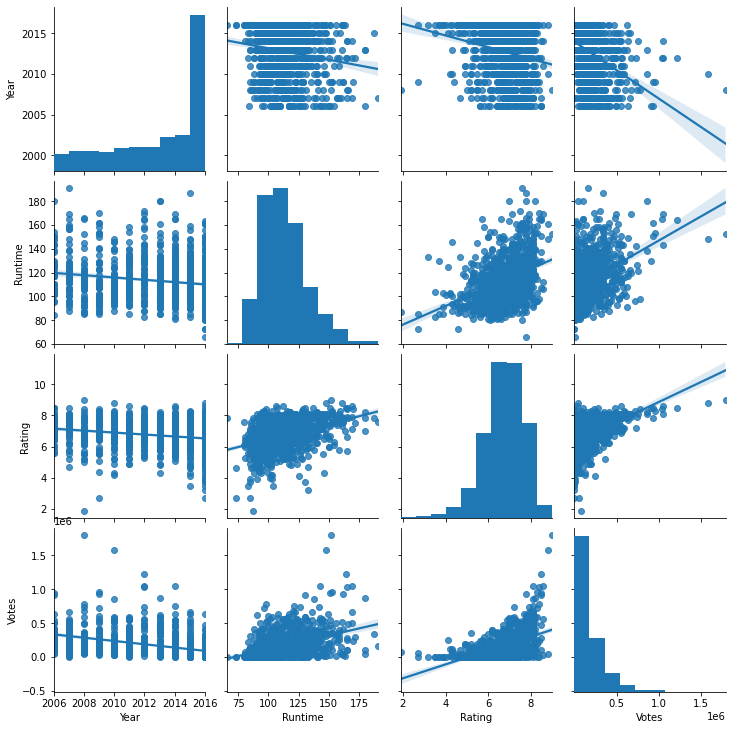

In [5]:
graph = sns.pairplot(df, kind="reg")

# 3. Processing missing values and/or outliers

## - Explain how you handle the missing of categorical or/and numerical variables?

## Categorical

In [7]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

df[categorical_features].fillna("N/A", inplace=True)

## Numerical

In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
missing_values = df[numerical_features].isnull()
mean = df[numerical_features].mean()
df.replace(missing_values, mean, inplace=True)

## Check the result

In [9]:
print(df)

                       Title      Genre              Director  Year  Runtime  \
0    Guardians of the Galaxy     Action            James Gunn  2014      121   
1                 Prometheus  Adventure          Ridley Scott  2012      124   
2                      Split     Horror    M. Night Shyamalan  2016      117   
3                       Sing  Animation  Christophe Lourdelet  2016      108   
4              Suicide Squad     Action            David Ayer  2016      123   
..                       ...        ...                   ...   ...      ...   
995     Secret in Their Eyes      Crime             Billy Ray  2015      111   
996          Hostel: Part II     Horror              Eli Roth  2007       94   
997   Step Up 2: The Streets      Drama            Jon M. Chu  2008       98   
998             Search Party  Adventure        Scot Armstrong  2014       93   
999               Nine Lives     Comedy      Barry Sonnenfeld  2016       87   

     Rating   Votes  
0       8.1  7570

## - What are your strategies of handling missing values or/and outliers?

In [12]:
mean = df[numerical_features].mean()
threshold = 10
df[numerical_features] = np.where(
    (df[numerical_features] - mean).abs() > threshold * df[numerical_features].std(),
    mean, df[numerical_features])

## Check the result

In [13]:
df.describe()

,Year,Runtime,Rating,Votes
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2012.783000,113.172000,6.723200,1.698083e+05
std,3.205962,18.810908,0.945429,1.887626e+05
min,2006.000000,66.000000,1.900000,6.100000e+01
25%,2010.000000,100.000000,6.200000,3.630900e+04
50%,2014.000000,111.000000,6.800000,1.107990e+05
75%,2016.000000,123.000000,7.400000,2.399098e+05
max,2016.000000,191.000000,9.000000,1.791916e+06


# 4. Processing categorical and/or numerical data

## - Explain how you do transformation (categorical => numerical, or numerical => categorical

## categorical => numerical

In [14]:
df1 = df

In [15]:
categorical_features = [feature for feature in df1.columns if df1[feature].dtypes == 'O']
print('Number of categorical variables: ', len(categorical_features))
df1[categorical_features].head()

Number of categorical variables:  3


,Title,Genre,Director
0,Guardians of the Galaxy,Action,James Gunn
1,Prometheus,Adventure,Ridley Scott
2,Split,Horror,M. Night Shyamalan
3,Sing,Animation,Christophe Lourdelet
4,Suicide Squad,Action,David Ayer


In [16]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
encoded = onehot.fit_transform(df1[categorical_features])
df1_encoded = pd.DataFrame(encoded.toarray(), columns=onehot.get_feature_names(categorical_features))
df1 = pd.concat([df1, df1_encoded], axis=1)
df1.drop(categorical_features, axis=1, inplace=True)

## Check the result

In [17]:
print(df1)

       Year  Runtime  Rating     Votes  Title_(500) Days of Summer  \
0    2014.0    121.0     8.1  757074.0                         0.0   
1    2012.0    124.0     7.0  485820.0                         0.0   
2    2016.0    117.0     7.3  157606.0                         0.0   
3    2016.0    108.0     7.2   60545.0                         0.0   
4    2016.0    123.0     6.2  393727.0                         0.0   
..      ...      ...     ...       ...                         ...   
995  2015.0    111.0     6.2   27585.0                         0.0   
996  2007.0     94.0     5.5   73152.0                         0.0   
997  2008.0     98.0     6.2   70699.0                         0.0   
998  2014.0     93.0     5.6    4881.0                         0.0   
999  2016.0     87.0     5.3   12435.0                         0.0   

     Title_10 Cloverfield Lane  Title_10 Years  Title_12 Years a Slave  \
0                          0.0             0.0                     0.0   
1          

# 5. Feature scaling

## - Explain how you scale the numerical features?


In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df2 = df

scaler = StandardScaler()
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])

scaler = MinMaxScaler()
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])

print(df2.head())

                     Title      Genre              Director  Year  Runtime  \
0  Guardians of the Galaxy     Action            James Gunn   0.8    0.440   
1               Prometheus  Adventure          Ridley Scott   0.6    0.464   
2                    Split     Horror    M. Night Shyamalan   1.0    0.408   
3                     Sing  Animation  Christophe Lourdelet   1.0    0.336   
4            Suicide Squad     Action            David Ayer   1.0    0.456   

     Rating     Votes  
0  0.873239  0.422474  
1  0.718310  0.271093  
2  0.760563  0.087923  
3  0.746479  0.033755  
4  0.605634  0.219697  
